# 1. Point patterns

In [64]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

df = pd.read_pickle("all_tagged_with_location.pickle")
df['lat'] = df['user_loc'].apply(lambda x: float(x[0]))
df['lon'] = df['user_loc'].apply(lambda x: float(x[1]))


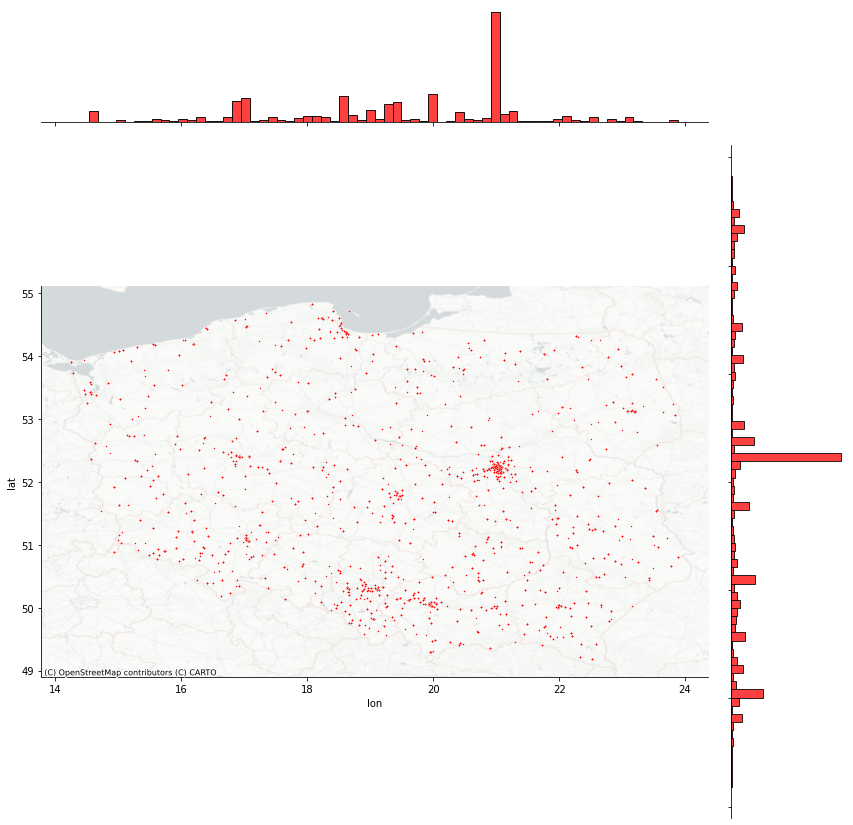

In [17]:
import matplotlib.pyplot as plt

joint_axes = seaborn.jointplot(
    x='lon', y='lat', data=df, s=2, height=12, color="red"
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
)

plt.savefig(
    "map-hist",
    dpi=200,
    bbox_inches="tight",
    pad_inches=2,
    facecolor="white",
)


# 2. Rozkład liczby tweetów z pojedynczej lokalizacji

In [3]:
import pickle

with open('./locations_look_up.pickle', 'rb') as handle:
    locations_look_up = pickle.load(handle)

with open("all_tagged_with_location.pickle", "rb") as handle:
    df_tagged_loc = pickle.load(handle)


In [22]:
df_posts_in_locations = df_tagged_loc.groupby(['user_loc']).size().sort_values().to_frame().reset_index()
df_posts_in_locations = df_posts_in_locations.rename(columns={0:"n_posts"})
df_posts_in_locations.iloc[:-1, :]

,user_loc,n_posts
0,"(51.758285900000004, 20.25099803272574)",1
1,"(50.8697353, 20.6346534)",1
2,"(50.8711584, 20.627572)",1
3,"(50.872464550000004, 16.32287834675313)",1
4,"(53.6851128, 15.4195028)",1
...,...,...
978,"(50.5687422, 19.2343995)",1880
979,"(51.772806599999996, 19.47849495849145)",2378
980,"(52.4006632, 16.91973259178088)",3106
981,"(51.1089776, 17.0326689)",3276


In [26]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df_posts_in_locations.iloc[:-1, :]["n_posts"],
        name='control', # name used in legend and hover labels
        nbinsx=1000
))

fig.update_layout(
    title_text='Rozkład liczby postów z lokalizacji', # title of plot
    xaxis_title_text='Liczba postów', # xaxis label
    yaxis_title_text='Liczba lokalizacji', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.2) # gap between bars of the same location coordinates


fig.show()

In [53]:
names = {"Gdansk. Poland": "Gdańsk", "Szczecin, Zachodniopomorskie":"Szczecin", "Polska, Śląskie":"Śląskie", "Łódź, Poland":"Łódź", "🇵🇱 małopolskie, Kraków": "Kraków", "Warszawa, Dublin, Nowy Jork":"Warszawa"}

In [55]:
locations_name = pd.DataFrame(locations_look_up.items(), columns=['name', 'location'])

loc_name_df = df_posts_in_locations.iloc[-10:, :].merge(locations_name, left_on="user_loc", right_on="location")

loc_name_df.drop_duplicates(subset=['user_loc'], inplace=True)

loc_name_df["name"] = loc_name_df["name"].apply(lambda x: names[x] if x in names else x.title())
loc_name_df

,user_loc,n_posts,name,location
0,"(54.5164982, 18.5402738)",1006,Gdynia,"(54.5164982, 18.5402738)"
15,"(52.5461934, 21.2073404)",1526,Mazowieckie,"(52.5461934, 21.2073404)"
35,"(53.4301818, 14.5509623)",1547,Szczecin,"(53.4301818, 14.5509623)"
54,"(54.36119285, 18.62860883362069)",1834,Gdańsk,"(54.36119285, 18.62860883362069)"
86,"(50.5687422, 19.2343995)",1880,Śląskie,"(50.5687422, 19.2343995)"
120,"(51.772806599999996, 19.47849495849145)",2378,Łódź,"(51.772806599999996, 19.47849495849145)"
151,"(52.4006632, 16.91973259178088)",3106,Poznań,"(52.4006632, 16.91973259178088)"
186,"(51.1089776, 17.0326689)",3276,Wrocław,"(51.1089776, 17.0326689)"
230,"(50.0619474, 19.9368564)",3477,Kraków,"(50.0619474, 19.9368564)"
288,"(52.2319581, 21.0067249)",14829,Warszawa,"(52.2319581, 21.0067249)"


In [58]:
import plotly.express as px

fig = px.bar(
    loc_name_df,
    x="name",
    y="n_posts",
    text="n_posts",
    title="Miejsca z największą liczbą postów",
    color="name",
    labels={
        "hate_share": "Udział postów ofensywnych",
        "n_posts": "Liczba postów",
        "name": "Lokalizacja"
    },
)
fig.update_traces(
    textposition="inside", textfont=dict(color="white")
)
fig.update_layout(
    barmode="stack",
    xaxis={"categoryorder": "total descending"},
    width=1400,
    height=600,
    showlegend=False,
)

fig.show()

- dla hatu topka wyglada tak samo, co bylo to przewidzenia